### Homework 1 (Review of some CSCI 183 concepts)
*For any questions or concerns please email your instructor at `smanna@scu.edu`*
##### Due -  04/07/21 - 11:59p 

**Name:** `Alex Varon`

**Email** `avaron@scu.edu`

**Objectives:** The aim of this homework is to make you review some of the machine learning concepts (classification) in your CSCI 183. You will have to use `sklearn`, `knn`, and `logistic regression` for completing this homework. 

**Problem Statement:** You are given `iris` dataset. Your task is to use `Logistic Regression` and `KNN` clasifiers to categorize the species of flowers. This time you will use the whole dataset for training, and the same dataset for testing. Though this is not an ideal setting, we will learn about this more in our Machine Learning class in the subsequent lectures.

**Submission Instructions:** 
* Please download `hw1.ipynb`and insert cells in the `hw1.ipynb` to complete your homework and submit the same file to Camino under `Homework` $\rightarrow$ `hw1`.
* Please make sure you type your `Name` and `Email` on top of your submission file in the placeholder above. 

**Honor Code:** You are expected to complete the homework on your own. Solutions might exist elsewhere, but you are not allowed to copy them. 

*NOTE*: I have imported the data set and the library for you in the cell below. Please make a note that you might be needing more libraries, so please feel free to add them.

In [2]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

Make sure you look at the data, identify if there are any missing values, scale the data if needed. Ideally you will have to deal with `exploratory data analysis` in the first part of this homework

#### Part I (5 pts): Exploring the dataset

In [25]:
# Insert cells to perform this. This is an open question. 
# I want to see what techniques you would use to understand the data.
import pandas as pd
import numpy as np

print(iris.feature_names)
print(iris.target_names)

print(iris.data)
print(iris.target)

print(iris.data.shape)
print(iris.target.shape)

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['Species']) #convert to pandas dataframe to visualize
#df.head()
df.describe() #looking at the mean, std, min, max, etc.
#there aren't any na or null rows/cols

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Part II (10 pts):  Classification 

**Evaluation procedure - Train and test on the entire dataset**

In [24]:
# Use Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
logreg = LogisticRegression(random_state=0, solver="lbfgs", multi_class="multinomial")
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
probs_y=logreg.predict_proba(X_test)


### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.04          | 0.96      
0          | 0          | 0.97       | 0.03          | 0.0       
2          | 2          | 0.0        | 0.06          | 0.94      
2          | 2          | 0.0        | 0.02          | 0.98      
2          | 2          | 0.0        | 0.07          | 0.93      
1          | 1          | 0.01       | 0.78          | 0.21      
1          | 2          | 0.0        | 0.43          | 0.57      
0          | 0          | 0.99       | 0.01          | 0.0       
0          | 0          | 0.99       | 0.01          | 0.0       
2          | 1          | 0.0        | 0.58          | 0.42      
0          | 0          | 0.86       | 0.14          | 0.0       
0          | 0          | 0.98       | 0.02          | 0.0       
0          | 0          | 0.92       | 0.08          | 0.0       
1       

In [26]:
# Compute accuracy for evaluating the model
logreg.score(X_test, y_test)

print(logreg.predict(X_test),logreg.score(X_test, y_test))

[2 0 2 2 2 1 2 0 0 1 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2] 0.9333333333333333


In [10]:
# Use KNN    
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(y_test,y_pred)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

0.9226666666666664 25


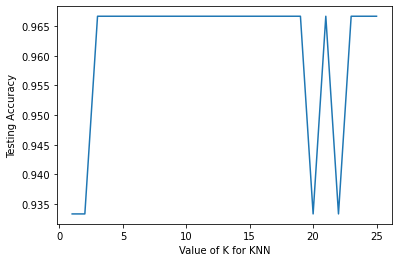

In [30]:
# Compute accuracy for evaluating the model
import matplotlib.pyplot as plt

plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
scores_list
i=0
totalAccuracy = 0
for i in range (len(scores_list) -1):
    totalAccuracy = totalAccuracy + scores_list[i]
    i=i+1

totalAccuracy = totalAccuracy/(len(scores_list))


print(totalAccuracy)

#### Part III (5 pts): Comparing results

In [36]:
# Create a table to compare the resuls you computed in the above two methods.
lis =[]
ind = []
i=1
temp =""
for i in range (len(scores_list)):
    lis.append(logreg.score(X_test, y_test))
    temp = str(i)
    ind.append("K="+str(i))
    i=i+1
accur = {'KNN Accuracy': scores_list,
        'Logistic Accuracy': lis
        }

df1 = pd.DataFrame(accur, columns = ['KNN Accuracy', 'Logistic Accuracy'], index = ind)
print (df1)

      KNN Accuracy  Logistic Accuracy
K=0       0.933333           0.933333
K=1       0.933333           0.933333
K=2       0.966667           0.933333
K=3       0.966667           0.933333
K=4       0.966667           0.933333
K=5       0.966667           0.933333
K=6       0.966667           0.933333
K=7       0.966667           0.933333
K=8       0.966667           0.933333
K=9       0.966667           0.933333
K=10      0.966667           0.933333
K=11      0.966667           0.933333
K=12      0.966667           0.933333
K=13      0.966667           0.933333
K=14      0.966667           0.933333
K=15      0.966667           0.933333
K=16      0.966667           0.933333
K=17      0.966667           0.933333
K=18      0.966667           0.933333
K=19      0.933333           0.933333
K=20      0.966667           0.933333
K=21      0.933333           0.933333
K=22      0.966667           0.933333
K=23      0.966667           0.933333
K=24      0.966667           0.933333
